__Linear Regression__


$Y = w \space X + b$

$Y$ : Dependent Variable

$X$ : Independent Variable

$w$ : Weight

$b$ : Bias





__Gredient Decent__

an optimization algorithm used for minimizing the loss function in multiple machine learing algorithm

$
w = w - α \cdot \partial{w} \\
$

$
b = b - α \cdot \partial{b} \\[1em]
$

$ \begin{align}
\partial{w} = \frac{-2}{n} \sum_{i=0}^{n}{x_i \space (y_i - y_{i \space pred})} \\
\end{align}$

$\begin{align}
\partial{b} = \frac{-2}{n} \sum_{i=0}^{n}{(y_i - y_{i \space pred})}
\end{align}$

In [103]:
# importing numpy library
import numpy as np

## Linear Regression

In [104]:
class Linear_Regression():

# initiating the parameters ( learing rate & no. of iterations )
  def __init__(self, learing_rate, no_of_iterations):

    self.learning_rate = learing_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y):

    # number of training examples (m) & number of features (n)

    self.m, self.n = X.shape  # number of rows and columns

    # initiating the weights and bias

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Desent

    for i in range(self.no_of_iterations):
      self.updates_weights()



  def updates_weights(self, ):

    Y_prediction = self.predict(self.X)

    # calculate gredients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - (2 * np.sum(self.Y - Y_prediction)) / self.m

    # updating the weights

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  def predict(self, X):

    return X.dot(self.w) + self.b


## Using linear regression for prediction

```
Work flow of the Linear Regression model:

Step 1: Set Learning Rate & Number of Iterations; Initiate Random weight and bias value.

Step 2: Build Linear Regression Equation. (y = wx + b)

Step 3: Find the "y pred" value for given x value for the corresponding weight & bias.

Step 4: Check the loss function for these parameter values. ( difference between "y pred" & "true y")

Step 5: Update the parameter values using Gradient Descent. (new weight & bias value)

Step 6: Step 3, 4, 5 are repeated till we get minimum loss function
Finally we will get the best model (best weight and bias value) as it has minimum loss function.

copied from https://www.youtube.com/@Siddhardhan
```

In [105]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [106]:
# loading the data from csv file to a pandas dataframe
# https://drive.google.com/drive/folders/1BJLh_8Kx88V6ItrdLA5CQ63RIFcjKkFV
salary_data = pd.read_csv('/content/salary_data.csv')

In [107]:
# printing the first 5 columns of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [108]:
# last 5 rows of the dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [109]:
# number of rows & columns in the dataframe
salary_data.shape

(30, 2)

In [110]:
# checking the missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Spliting the features & target

In [111]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [112]:
print(X,Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] [ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training & testing data

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=2 )

Training the Linear Regression Model

In [114]:
model = Linear_Regression( learing_rate= 0.02, no_of_iterations= 1000)

In [115]:
model.fit(X_train, Y_train)

In [116]:
# printint the parameter values : weights & bias
print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


$y$ = 9514 ($x$) + 23697

$salary$ = 9514 ($experience$) + 23697

Predicting the salary value for test data

In [117]:
test_data_prediction = model.predict(X_test)

In [118]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted values and actual values

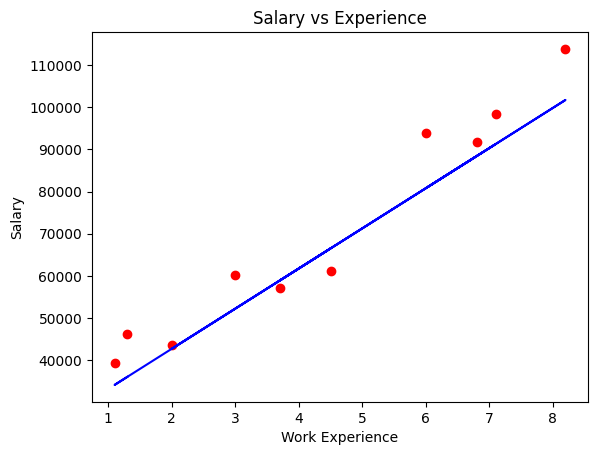

In [119]:
plt.scatter(X_test, Y_test, color= 'red')
plt.plot(X_test, test_data_prediction, color= 'blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()